In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
#importing data
df = pd.read_excel("E:\ML ASSIGNMENTS\ASSIGNMENT 2\Concrete_Data.xls")
print('The shape of given data is:',df.shape)
df

The shape of given data is: (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
#obtaining target values
Y = df.iloc[:,8]
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [4]:
#obtaining feature values
X=df.iloc[:,:8]
print(f'Number of features in the given dataset is {X.shape[1]}')
X = np.array(X)

Number of features in the given dataset is 8


In [5]:
#splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.30,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
print(f'The shape of test data is:{x_test.shape}')

The shape of training data is:(721, 8)
The shape of test data is:(309, 8)


Q.1) Write a Python program to solve the linear regression problem using the
Normal Equations approach. Compare your results with the results you
obtained in the last homework assignment

In [6]:
#solving normal equations for train data
a=np.ones(x_train.shape[0]).reshape(-1,1)
X_train=np.concatenate((a,x_train),axis=1)
k=np.dot(X_train.T,X_train)
k = np.linalg.inv(k)
w=np.dot(k,X_train.T)
w=np.dot(w,y_train)
print('The number of parametres is:',w.shape[0])
print(w)

The number of parametres is: 9
[-1.31922513e+01  1.21970486e-01  1.05225700e-01  8.73089786e-02
 -1.55151407e-01  3.30203805e-01  1.25267069e-02  1.43280445e-02
  1.15553712e-01]


In [7]:
#predicting y values for test and training data
b = np.ones(x_test.shape[0]).reshape(-1,1)
X_test = np.concatenate((b,x_test),axis=1)
ypred_test=np.dot(X_test,w)
ypred_train = np.dot(X_train,w)

In [8]:
#reading into csv file
outputdf = pd.DataFrame({'y_test':y_test,'ypred_test':ypred_test})
outputdf
outputdf.to_csv("E:\ML ASSIGNMENTS\ASSIGNMENT 2\submission.csv")

In [9]:
#Mean square error without using scikit-learn
Y_test=np.array(y_test)
Ypred_test = np.array(ypred_test)
mse=0
m = x_test.shape[0]
for i in range(m):
    mse = mse + (Y_test[i] - Ypred_test[i])**2
mse = (1/m)*mse
print(f'The mean square error of the test data is: {mse}')
print(f'The value of cost function of the test data is: {mse/2}')

The mean square error of the test data is: 120.19296189134495
The value of cost function of the test data is: 60.096480945672475


In [10]:
#Test data
mse_test = mean_squared_error(y_test,ypred_test)
print(f'Mean squared error of test data is:{mse_test}')
cost_test = mean_squared_error(y_test,ypred_test)/2
print(f'Cost function value of test data is:{cost_test}')
r2score_test = r2_score(y_test,ypred_test)
print(f'R square value of test data is:{r2score_test}')

Mean squared error of test data is:120.19296189134488
Cost function value of test data is:60.09648094567244
R square value of test data is:0.5414363184391305


In [11]:
#Training data
mse_train = mean_squared_error(y_train,ypred_train)
print(f'Mean squared error of training data is:{mse_train}')
cost_train = mean_squared_error(y_train,ypred_train)/2
print(f'Cost function value of training data is:{cost_train}')
r2score_train = r2_score(y_train,ypred_train)
print(f'R square value of training data is:{r2score_train}')


Mean squared error of training data is:102.54784585315682
Cost function value of training data is:51.27392292657841
R square value of training data is:0.6411304739211958


INFERENCES:

Metrics obtained in the previous lab using scikit-learn:
Mean squared error of training data is:102.54784585315686
Cost function value of training data is:51.27392292657843
R square value of training data is:0.6411304739211956
Mean squared error of test data is:120.18296189134488
Cost function value of test data is:56.82469060630596
R square value of test data is:0.5664015776307874

Metrics obtained from solving normal equation:
Mean squared error of training data is:102.54784585315682
Cost function value of training data is:51.27392292657841
R square value of training data is:0.6411304739211958
Mean squared error of test data is:120.19296189134488
Cost function value of test data is:60.09648094567244
R square value of test data is:0.5414363184391305

The metrics obtained for training data and test data was found to be same for both cases using scikitlearn and using normal equation

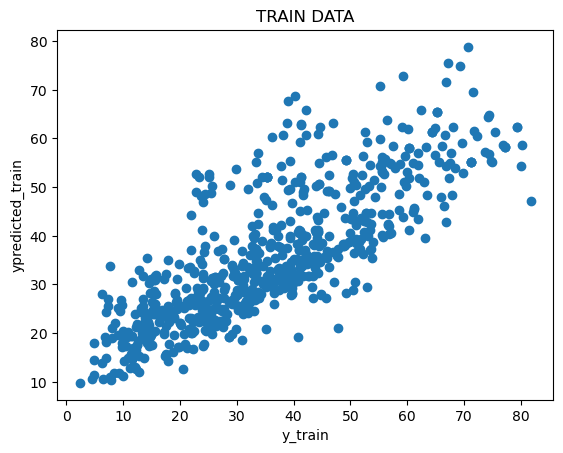

In [12]:
#plotting predicted and actual values
plt.scatter(y_train,ypred_train)
plt.xlabel('y_train')
plt.ylabel('ypredicted_train')
plt.title('TRAIN DATA')
plt.show()

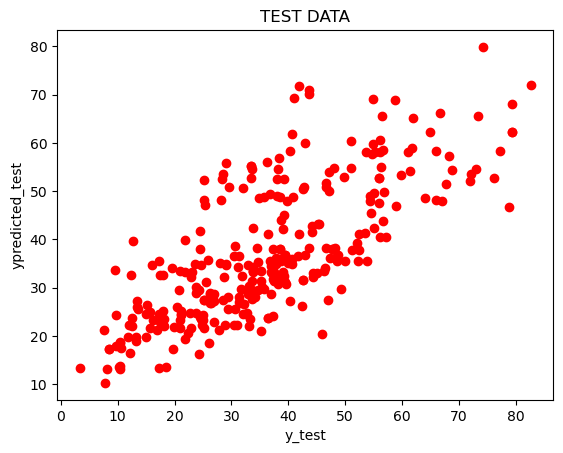

In [13]:
plt.scatter(y_test,ypred_test,color='Red')
plt.xlabel('y_test')
plt.ylabel('ypredicted_test')
plt.title('TEST DATA')
plt.show()

Q.2)Introduce L2 regularization into the model and solve this for various values
of the regularization parameter.

The avergae value of mean square error of train data with L2 regularisation is :102.54789224126908
The avergae value of mean square error of test data with L2 regularisation is :120.18536586486002
The avergae value of r2 score of train data with L2 regularisation is :0.6411303115844863
The avergae value of r2 score of test data with L2 regularisation is :0.5414652990201507


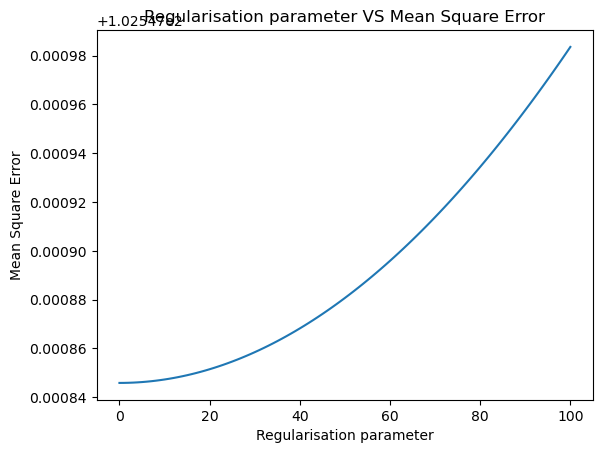

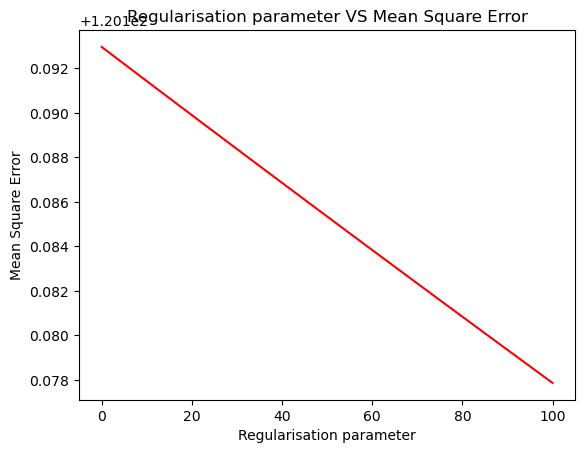

In [14]:
#model with L2 regularisation using scikit learn
msetrain_l2=[]
msetest_l2 = []
alpha=[]
r2score_train_l2=[]
r2score_test_l2=[]
i=0
while i <=100:
    l2_reg = Ridge(alpha=i,max_iter = 10000)
    l2_reg.fit(x_train,y_train)
    yhat_train = l2_reg.predict(x_train)
    yhat_test = l2_reg.predict(x_test)
    mse_train = mean_squared_error(y_train,yhat_train)
    mse_test = mean_squared_error(y_test,yhat_test)
    r2score_train = r2_score(y_train,yhat_train)
    r2score_test = r2_score(y_test,yhat_test)
    msetrain_l2.append(mse_train)
    msetest_l2.append(mse_test)
    r2score_train_l2.append(r2score_train)
    r2score_test_l2.append(r2score_test)
    alpha.append(i)
    i = i + 1
print(f'The avergae value of mean square error of train data with L2 regularisation is :{np.mean(msetrain_l2)}')
print(f'The avergae value of mean square error of test data with L2 regularisation is :{np.mean(msetest_l2)}')
print(f'The avergae value of r2 score of train data with L2 regularisation is :{np.mean(r2score_train_l2)}')
print(f'The avergae value of r2 score of test data with L2 regularisation is :{np.mean(r2score_test_l2)}')
plt.plot(alpha,msetrain_l2)
plt.xlabel('Regularisation parameter')
plt.ylabel('Mean Square Error')
plt.title('Regularisation parameter VS Mean Square Error')
plt.show()
plt.plot(alpha,msetest_l2,color='red')
plt.xlabel('Regularisation parameter')
plt.ylabel('Mean Square Error')
plt.title('Regularisation parameter VS Mean Square Error')
plt.show()

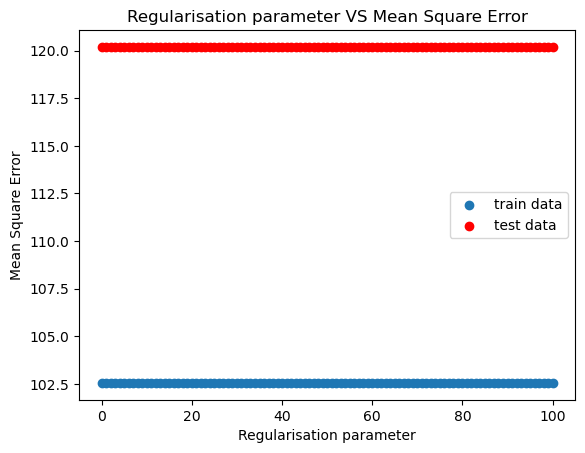

In [15]:
plt.scatter(alpha,msetrain_l2,label='train data')
plt.xlabel('Regularisation parameter')
plt.ylabel('Mean Square Error')
plt.title('Regularisation parameter VS Mean Square Error')
plt.scatter(alpha,msetest_l2,color='red',label = 'test data')
plt.xlabel('Regularisation parameter')
plt.ylabel('Mean Square Error')
plt.title('Regularisation parameter VS Mean Square Error')
plt.legend()
plt.show()

In [16]:
#model with L2 regularisation using Normal equation

#training data
a=np.ones(x_train.shape[0]).reshape(-1,1)
X_train=np.concatenate((a,x_train),axis=1)
k=np.dot(X_train.T,X_train)
identity = np.identity(k.shape[0])
lambda1=0.25
identity=np.dot(lambda1,identity)
k = np.add(k,identity)
k = np.linalg.inv(k)
w=np.dot(k,X_train.T)
w=np.dot(w,y_train)
print(w)
ypred_train = np.dot(X_train,w)
mse_train = mean_squared_error(y_train,ypred_train)
print(f'Mean squared error of training data is:{mse_train}')
r2score_train = r2_score(y_train,ypred_train)
print(f'R square value of training data is:{r2score_train}')

#test data
b = np.ones(x_test.shape[0]).reshape(-1,1)
X_test = np.concatenate((b,x_test),axis=1)
ypred_test=np.dot(X_test,w)
mse_test = mean_squared_error(y_test,ypred_test)
print(f'Mean squared error of training data is:{mse_test}')
r2score_test = r2_score(y_test,ypred_test)
print(f'R square value of training data is:{r2score_test}')


[-4.19107381  0.11945857  0.10223157  0.08396931 -0.16728365  0.32098757
  0.00950186  0.01085535  0.11550471]
Mean squared error of training data is:102.56092715921358
R square value of training data is:0.6410846954646516
Mean squared error of training data is:120.3136173722114
R square value of training data is:0.5409759901417327


With L2 regularisation:
The avergae value of mean square error of train data with L2 regularisation is :102.54789224126908
The avergae value of mean square error of test data with L2 regularisation is :120.18536586486002
The avergae value of r2 score of train data with L2 regularisation is :0.6411303115844863
The avergae value of r2 score of test data with L2 regularisation is :0.5414652990201507

without L2 regularisation:
Mean squared error of training data is:102.54784585315682
R square value of training data is:0.6411304739211958
Mean squared error of test data is:120.19296189134488
R square value of test data is:0.5414363184391305

The difference observed between the metrics with and without regularisation was negligible.Error of test data was found to be more than training data in both cases.As the value of regularisation parameter increased,mean square error of training data seems to be increasing whereas mse decreases for test data,even though negligibly.



Use a quadratic model instead of the linear model.

In [17]:
#Quadratic model using scikit learn
poly = PolynomialFeatures(degree=2,include_bias = True)
x_train_poly = poly.fit_transform(x_train)
print(f'No. of features present is {x_train_poly.shape[1]}')
model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
ypred_train_poly = model_poly.predict(x_train_poly)
mse_train_poly = mean_squared_error(y_train,ypred_train_poly)
print(f'The mean square error of train data using quadratic model is {mse_train_poly}')
x_test_poly = poly.transform(x_test)
ypred_test_poly = model_poly.predict(x_test_poly)
mse_test_poly = mean_squared_error(y_test,ypred_test_poly)
print(f'The mean square error of test data using quadratic model is {mse_test_poly}')

No. of features present is 45
The mean square error of train data using quadratic model is 49.89515908180218
The mean square error of test data using quadratic model is 63.19226861654311


In [18]:
#quadratic model using normal equation
poly = PolynomialFeatures(degree=2,include_bias = False)


#training data
x_train_poly = poly.fit_transform(x_train)
print('No.of features in case of Quadratic model is',x_train_poly.shape[1])
a=np.ones(x_train_poly.shape[0]).reshape(-1,1)
X_train_poly=np.concatenate((a,x_train_poly),axis=1)
k=np.dot(X_train_poly.T,X_train_poly)
k = np.linalg.inv(k)
w=np.dot(k,X_train_poly.T)
w=np.dot(w,y_train)
print('The number of parametres is:',w.shape[0])
print(w)
ypred_train_poly = np.dot(X_train_poly,w)
mse_train_poly = mean_squared_error(y_train,ypred_train_poly)
print(f'The mean square error of train data using quadratic model is {mse_train_poly}')
r2score_train_poly = r2_score(y_train,ypred_train_poly)
print(f'R square value of test data is:{r2score_train_poly}')


#test data
x_test_poly = poly.transform(x_test)
b = np.ones(x_test_poly.shape[0]).reshape(-1,1)
X_test_poly = np.concatenate((b,x_test_poly),axis=1)
ypred_test_poly=np.dot(X_test_poly,w)
mse_test_poly = mean_squared_error(y_test,ypred_test_poly)
print(f'Mean squared error of test data is:{mse_test_poly}')
r2score_test_poly = r2_score(y_test,ypred_test_poly)
print(f'R square value of test data is:{r2score_test_poly}')


No.of features in case of Quadratic model is 44
The number of parametres is: 45
[-5.16621011e+03  3.02136506e+00  2.59959251e+00  2.17324869e+00
  1.48720119e+01  2.90427025e+01  3.34442187e+00  3.99191506e+00
  2.34452195e-01 -4.41491275e-04 -6.70911308e-04 -4.18225516e-04
 -4.77113687e-03 -9.74240154e-03 -8.71315507e-04 -1.04934423e-03
  1.84095400e-04 -3.04876722e-04 -1.43977455e-04 -4.14438564e-03
 -9.22250055e-03 -8.96804590e-04 -7.68663479e-04  4.34005352e-04
  4.58227134e-05 -4.47244129e-03 -1.46001341e-02 -6.83220457e-04
 -5.82914040e-04  8.10191137e-04 -8.81072125e-03 -3.27810335e-02
 -5.39012146e-03 -5.84900974e-03 -3.98492338e-04 -4.28328243e-02
 -8.72784676e-03 -1.22101854e-02  1.10745513e-03 -5.19035060e-04
 -1.23202836e-03 -7.37707634e-05 -8.23587718e-04  1.56339700e-04
 -6.10539976e-04]
The mean square error of train data using quadratic model is 49.89515908180321
R square value of test data is:0.8253902659354394
Mean squared error of test data is:63.19226865191222
R squ

In [19]:
#cubic polynomial
poly = PolynomialFeatures(degree=3,include_bias = True)
x_train_cube = poly.fit_transform(x_train)
print(f'No. of features present is {x_train_cube.shape[1]}')

No. of features present is 165


Mean square error decreased drastically when quadratic model is used and number of features were 45 including the bias term.


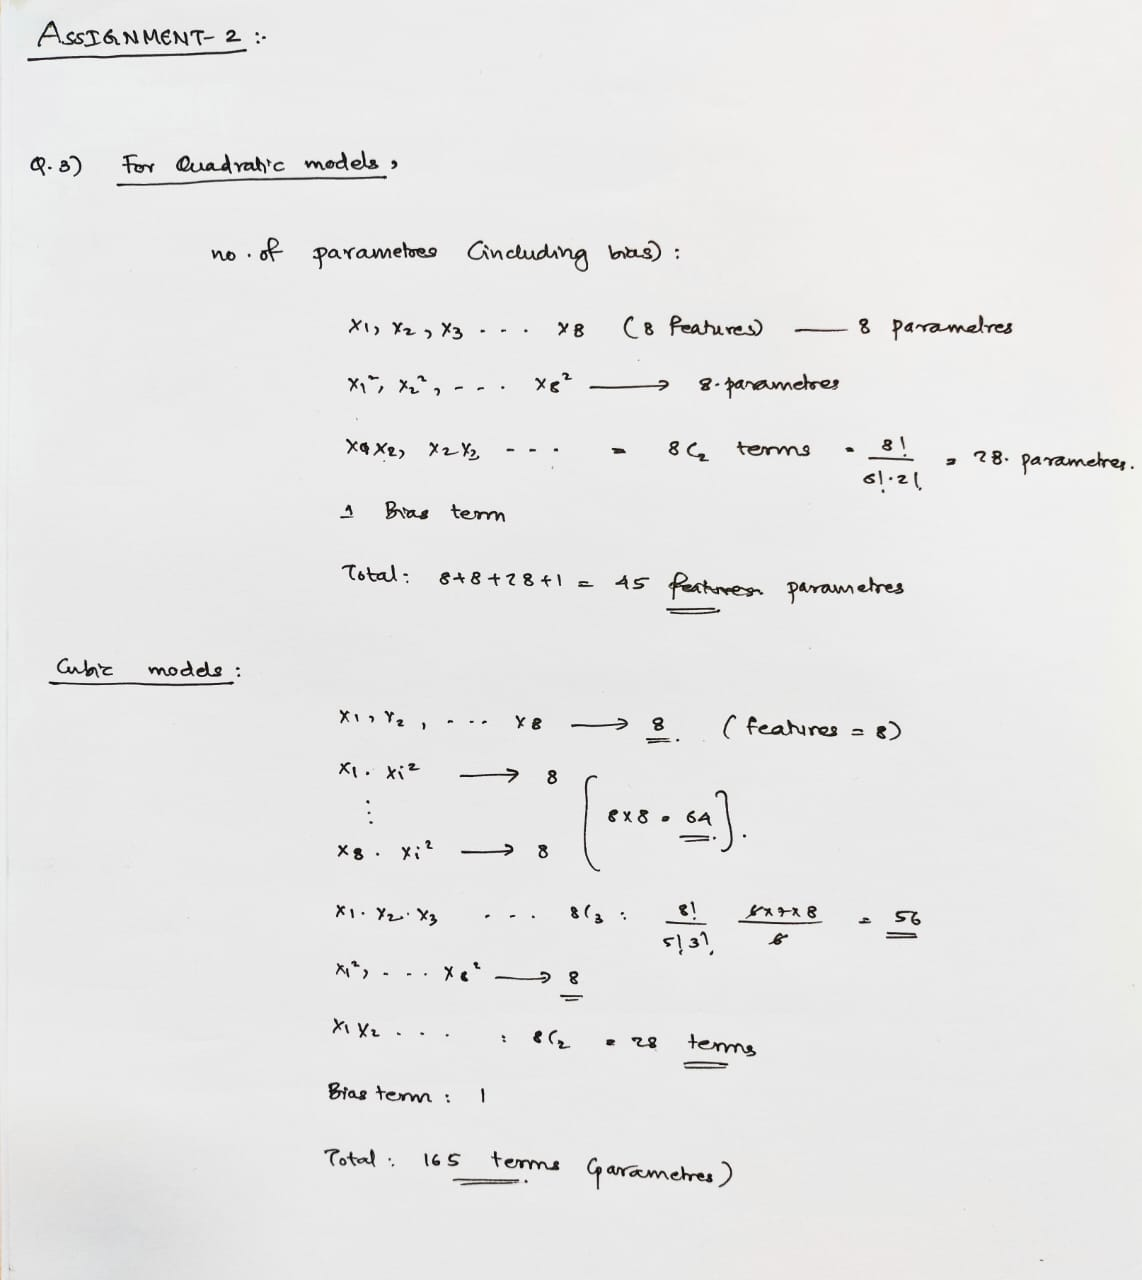

In [20]:
#Quadratic modelling of trained data without using scikit learn
d=np.empty((x_train.shape[0],0))
for i in range(x_train.shape[1]):
    for j in range(i+1):
        a=a+1
        k=x_train[:,i]*x_train[:,j]
        k=np.array(k)
        c = k.reshape(-1,1)
        d=np.concatenate((d,c),axis=1)
x_train_poly=np.concatenate((x_train,d),axis=1)
a=np.ones(x_train.shape[0]).reshape(-1,1)
x_train_poly=np.concatenate((a,x_train_poly),axis=1)
print(f'The shape of feature matrix for train data is {x_train_poly.shape}')
k=np.dot(x_train_poly.T,x_train_poly)
k = np.linalg.inv(k)
w=np.dot(k,x_train_poly.T)
w=np.dot(w,y_train)
print(f'Weights:\n{w}')
print('The number of parametres is:',w.shape[0])
ypred_train_poly = np.dot(x_train_poly,w)
mse_train_poly = mean_squared_error(y_train,ypred_train_poly)
print(f'The mean square error of train data using quadratic model is {mse_train_poly}')
r2score_train_poly = r2_score(y_train,ypred_train_poly)
print(f'R square value of test data is:{r2score_train_poly}')

The shape of feature matrix for train data is (721, 45)
Weights:
[-5.16621009e+03  3.02136505e+00  2.59959250e+00  2.17324868e+00
  1.48720119e+01  2.90427024e+01  3.34442185e+00  3.99191504e+00
  2.34452195e-01 -4.41491273e-04 -6.70911305e-04 -3.04876720e-04
 -4.18225512e-04 -1.43977452e-04  4.58227146e-05 -4.77113686e-03
 -4.14438563e-03 -4.47244127e-03 -8.81072124e-03 -9.74240153e-03
 -9.22250053e-03 -1.46001341e-02 -3.27810335e-02 -4.28328243e-02
 -8.71315503e-04 -8.96804585e-04 -6.83220452e-04 -5.39012145e-03
 -8.72784675e-03 -5.19035057e-04 -1.04934423e-03 -7.68663474e-04
 -5.82914034e-04 -5.84900973e-03 -1.22101854e-02 -1.23202836e-03
 -8.23587715e-04  1.84095400e-04  4.34005352e-04  8.10191138e-04
 -3.98492339e-04  1.10745513e-03 -7.37707635e-05  1.56339700e-04
 -6.10539976e-04]
The number of parametres is: 45
The mean square error of train data using quadratic model is 49.89515908180179
R square value of test data is:0.8253902659354444


In [21]:
#Quadratic modelling of trained data without using scikit learn
d=np.empty((x_test.shape[0],0))
for i in range(x_test.shape[1]):
    for j in range(i+1):
        a=a+1
        k=x_test[:,i]*x_test[:,j]
        k=np.array(k)
        c = k.reshape(-1,1)
        d = np.concatenate((d,c),axis=1)
x_test_poly=np.concatenate((x_test,d),axis=1)
a=np.ones(x_test.shape[0]).reshape(-1,1)
x_test_poly=np.concatenate((a,x_test_poly),axis=1)
print(f'The shape of feature matrix of test data is:{x_test_poly.shape}')
ypred_test_poly = np.dot(x_test_poly,w)
mse_test_poly = mean_squared_error(y_test,ypred_test_poly)
print(f'The mean square error of test data using quadratic model is {mse_test_poly}')
r2score_test_poly = r2_score(y_test,ypred_test_poly)
print(f'R square value of test data is:{r2score_test_poly}')

The shape of feature matrix of test data is:(309, 45)
The mean square error of test data using quadratic model is 63.192268651067025
R square value of test data is:0.7589070199883018
